<a href="https://colab.research.google.com/github/XJabin/EcoFriendly-WEB/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


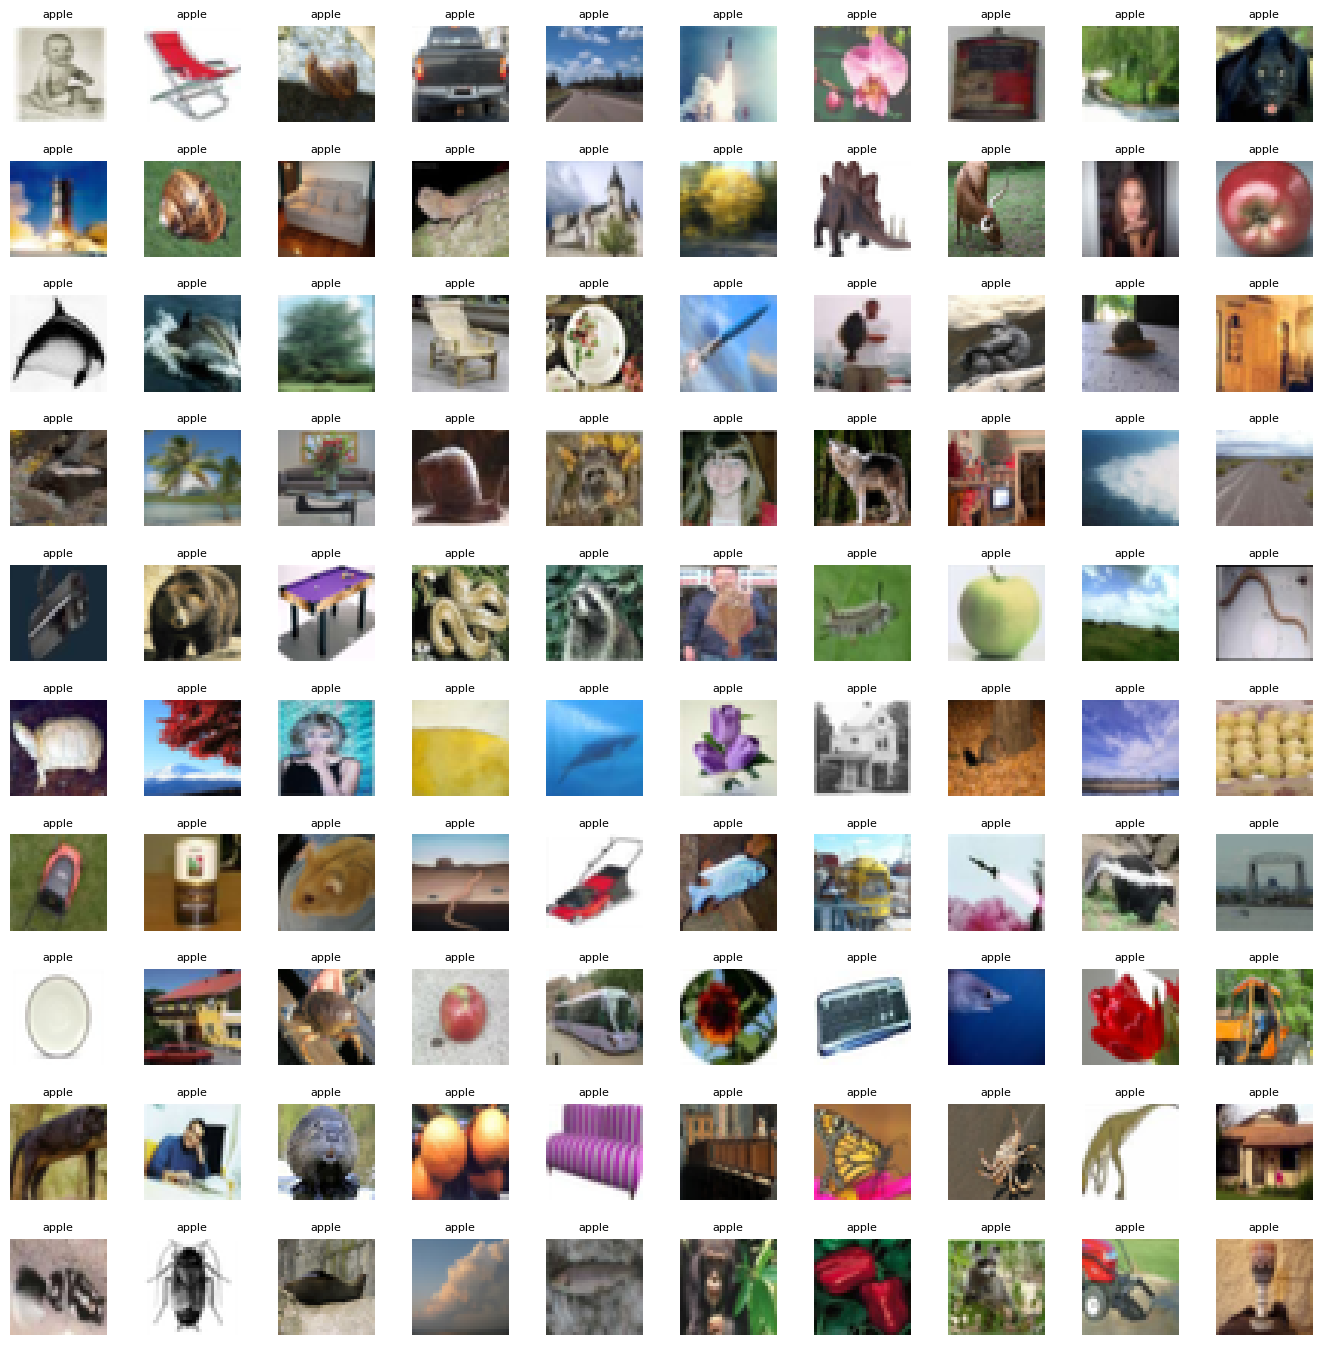

In [ ]:
labels = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle'
]

# Grid dimensions
W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize=(17, 17))
axes = axes.ravel()
n_train = len(X_train)

# Select random images and display them
for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_train)
    axes[i].imshow(X_train[index])  # Use x_train directly (already normalized)
    label_index = np.argmax(y_train[index])  # Decode one-hot label
    axes[i].set_title(labels[label_index], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)
plt.show()


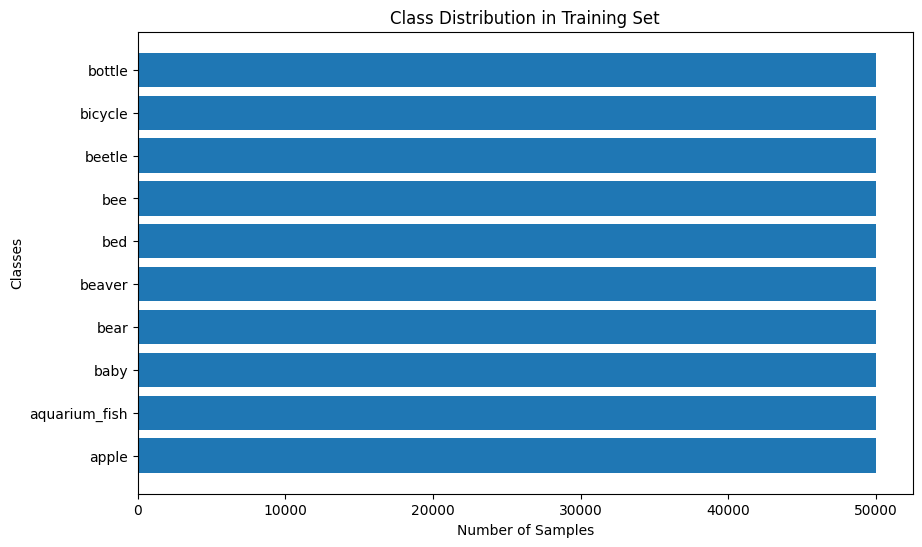

In [ ]:
classes_name = [ 'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle']
# Convert one-hot labels to class indices
y_train_indices = np.argmax(y_train, axis=1)

# Get unique class counts
classes, counts = np.unique(y_train_indices, return_counts=True)

# Plot class distribution
plt.figure(figsize=(10, 6))
plt.barh(classes_name, counts)
plt.xlabel('Number of Samples')
plt.ylabel('Classes')
plt.title('Class Distribution in Training Set')
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (100,) and arg 3 with shape (10,).

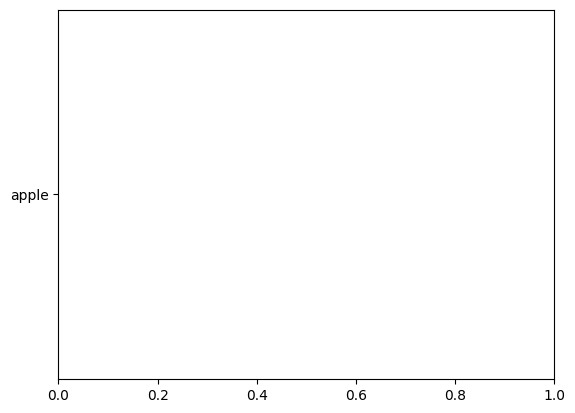

In [ ]:
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in testing set')

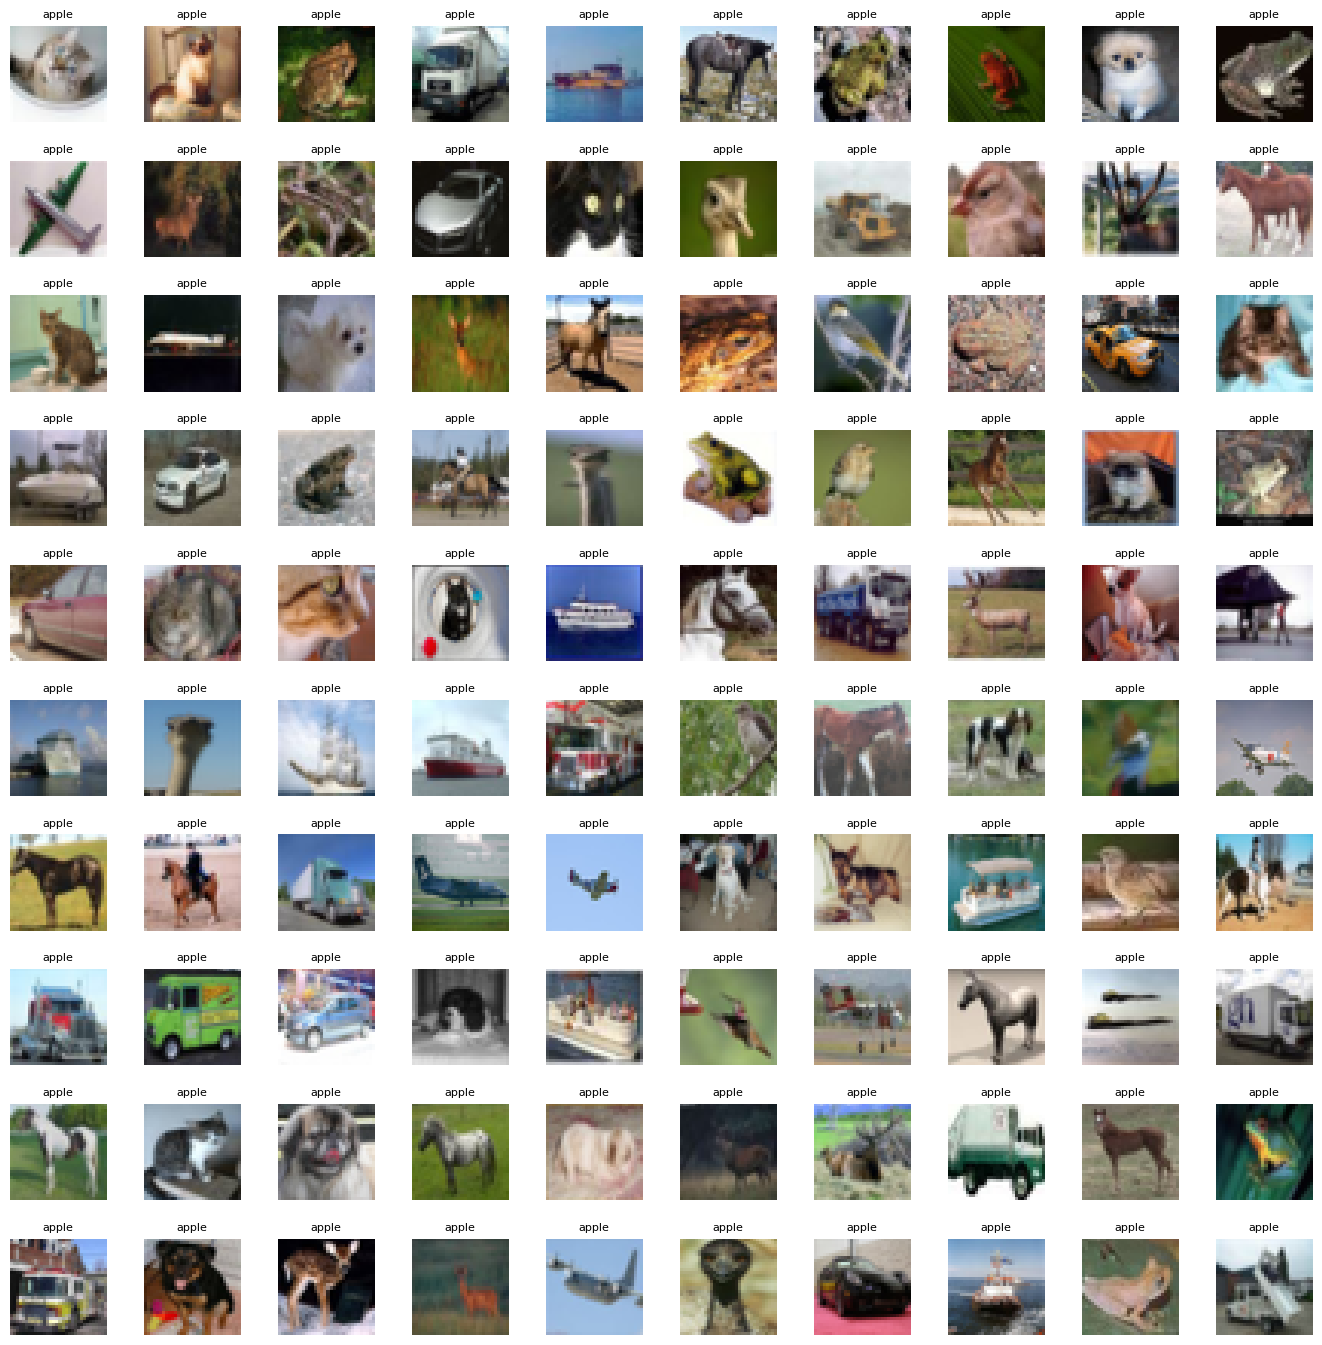

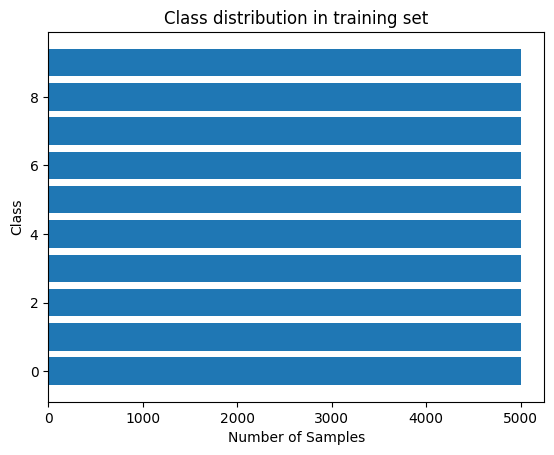

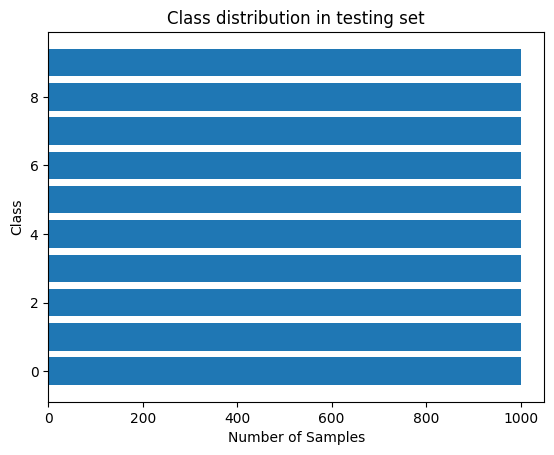

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 109s 137ms/step - accuracy: 0.2746 - loss: 1.9468 - val_accuracy: 0.4630 - val_loss: 1.4838
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 117s 149ms/step - accuracy: 0.4275 - loss: 1.5625 - val_accuracy: 0.5250 - val_loss: 1.3387
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 124s 126ms/step - accuracy: 0.4801 - loss: 1.4382 - val_accuracy: 0.5706 - val_loss: 1.2039
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 127ms/step - accuracy: 0.5093 - loss: 1.3640 - val_accuracy: 0.5657 - val_loss: 1.2351
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 100s 128ms/step - accuracy: 0.5286 - loss: 1.3131 - val_accuracy: 0.6184 - val_loss: 1.0757
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 126ms/step - accuracy: 0.5490 - loss: 1.2724 - val_accuracy: 0.6031 - val_loss: 1.1350
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 126ms/step - accuracy: 0.5660 - loss: 1.2195 - val_accuracy: 0.6331 - val_loss: 1.0596
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 98s 126ms/step - accuracy: 0.5733 - loss: 1.204

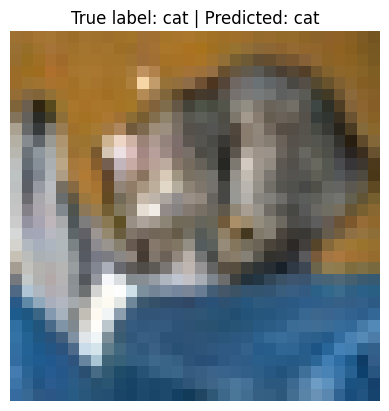

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder


# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Data Preprocessing
# One-hot encoding the labels
y_train = y_train.flatten()
y_test = y_test.flatten()

# Plot class distribution in training and testing set
def plot_class_distribution(labels, title):
    classes, counts = np.unique(labels, return_counts=True)
    plt.barh(classes, counts)
    plt.title(title)
    plt.xlabel('Number of Samples')
    plt.ylabel('Class')
    plt.show()

plot_class_distribution(y_train, 'Class distribution in training set')
plot_class_distribution(y_test, 'Class distribution in testing set')

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(x_train)

# Model Building using Sequential API
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes in CIFAR-10
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=30,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping])

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}")

# Test on one image from the CIFAR-10 test set
sample_image = x_test[0]  # Pick an image
sample_label = y_test[0]  # True label for the sample image

# Predict the class for the sample image
predicted_class = np.argmax(model.predict(np.expand_dims(sample_image, axis=0)))
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Display the image and prediction
plt.imshow(sample_image)
plt.title(f"True label: {class_names[sample_label]} | Predicted: {class_names[predicted_class]}")
plt.axis('off')
plt.show()


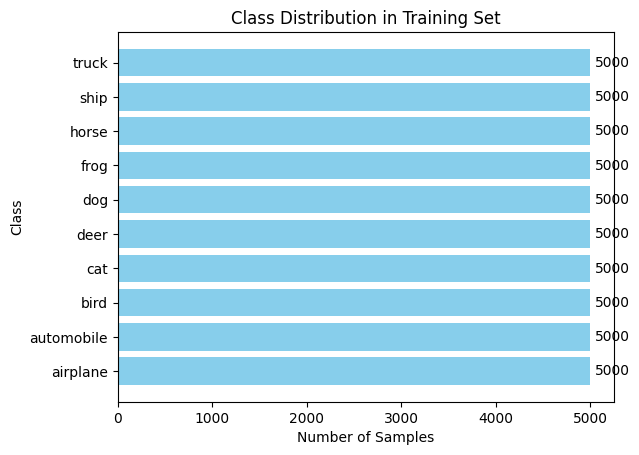

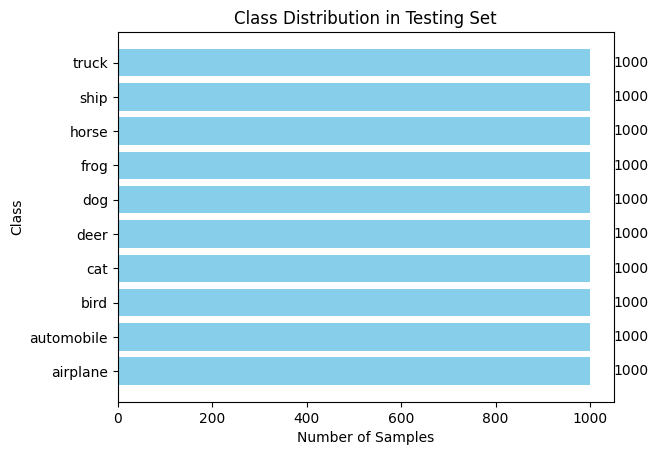

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 101s 125ms/step - accuracy: 0.2497 - loss: 2.0021 - val_accuracy: 0.4527 - val_loss: 1.5048
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 126ms/step - accuracy: 0.4080 - loss: 1.6142 - val_accuracy: 0.5085 - val_loss: 1.3476
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 97s 124ms/step - accuracy: 0.4662 - loss: 1.4868 - val_accuracy: 0.5105 - val_loss: 1.3622
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 125ms/step - accuracy: 0.4963 - loss: 1.4026 - val_accuracy: 0.5386 - val_loss: 1.2912
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 98s 125ms/step - accuracy: 0.5179 - loss: 1.3497 - val_accuracy: 0.5887 - val_loss: 1.1606
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 124ms/step - accuracy: 0.5317 - loss: 1.3103 - val_accuracy: 0.5849 - val_loss: 1.1576
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 123ms/step - accuracy: 0.5418 - loss: 1.2789 - val_accuracy: 0.6073 - val_loss: 1.1232
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 96s 122ms/step - accuracy: 0.5601 - lo

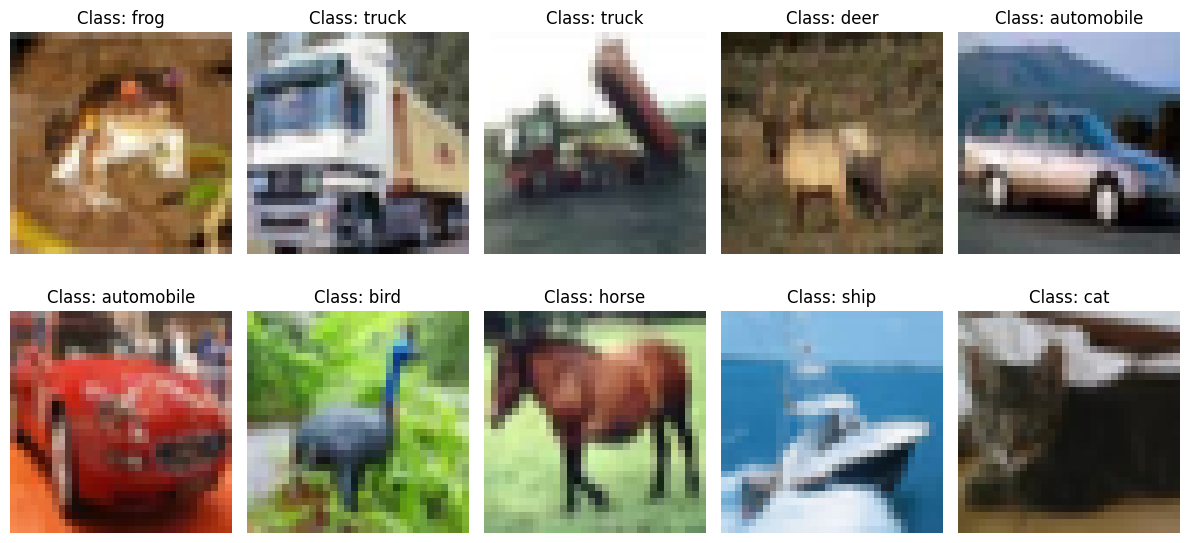

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


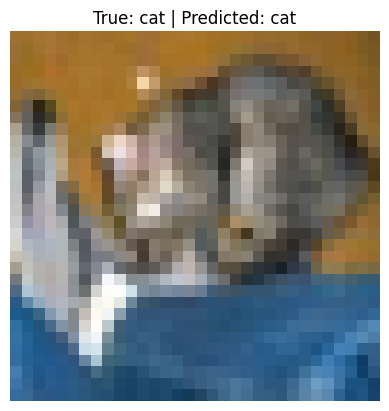

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the labels
y_train = y_train.flatten()
y_test = y_test.flatten()

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Function to plot class distribution with labels
def plot_class_distribution(labels, title):
    classes, counts = np.unique(labels, return_counts=True)
    plt.barh(class_names, counts, color='skyblue')
    plt.title(title)
    plt.xlabel('Number of Samples')
    plt.ylabel('Class')

    # Adding counts on the bars
    for i, count in enumerate(counts):
        plt.text(count + 50, i, str(count), va='center')
    plt.show()

# Plot class distributions
plot_class_distribution(y_train, 'Class Distribution in Training Set')
plot_class_distribution(y_test, 'Class Distribution in Testing Set')

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(x_train)

# Model Building using Sequential API
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes in CIFAR-10
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=30,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping])

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}")

# Display 10 images with their true class names
def display_sample_images(images, labels, class_names, n=10):
    plt.figure(figsize=(12, 6))
    for i in range(n):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f"Class: {class_names[labels[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display 10 images from the training set
display_sample_images(x_train, y_train, class_names)

# Test on one image from the CIFAR-10 test set
sample_image = x_test[0]  # Pick an image
sample_label = y_test[0]  # True label for the sample image

# Predict the class for the sample image
predicted_class = np.argmax(model.predict(np.expand_dims(sample_image, axis=0)))

# Display the image and its predicted class
plt.imshow(sample_image)
plt.title(f"True: {class_names[sample_label]} | Predicted: {class_names[predicted_class]}")
plt.axis('off')
plt.show()
